<a href="https://colab.research.google.com/github/MohamedAteya/Titanic-/blob/master/Titanic_Kaggel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,1601,B96 B98,S
freq,1,577,7,4,644


In [0]:
#frist drop unnecessary featuers / train data
#name 
#Ticket -> there are too many unique values
#passenger ID 

train_data = train_data.drop(['PassengerId','Ticket','Cabin'], axis = 1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
# drop unnecessary featuers / test data
# I did not drop PassengerId becuase of submition 
test_data = test_data.drop(['Ticket','Cabin'], axis = 1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [0]:
# analyze the Pclass 
p =train_data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived',ascending=False)

p

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
#analyze the Sex
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
#analyze SibSp
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index= False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
#analyze Parch
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index= False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<Figure size 720x720 with 0 Axes>

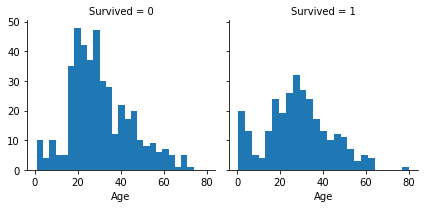

In [0]:
#age analysis
plt.figure(figsize = (10,10))
grid  = sns.FacetGrid(data = train_data,col = 'Survived')
grid.map(plt.hist, 'Age', bins = 25)

In [0]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Figure size 720x720 with 0 Axes>

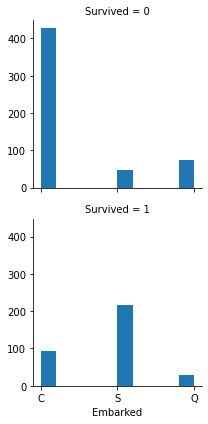

In [0]:
#analysis of 'Embarked'
plt.figure(figsize = (10,10))
grid = sns.FacetGrid(data =train_data , row = 'Survived')
grid.map(plt.hist , 'Embarked')

<Figure size 720x720 with 0 Axes>

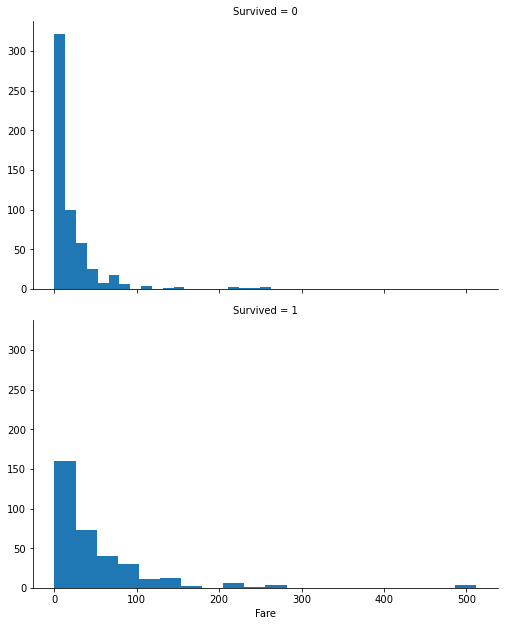

In [0]:
#fare analysis 
plt.figure(figsize = (10,10))
grid= sns.FacetGrid(data = train_data, row = 'Survived',height=4.4, aspect=1.6)
grid.map(plt.hist, 'Fare' , bins = 20, )
grid.add_legend()

In [0]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [0]:
#Embarked Nans with the majority 
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0])

# convert the catigorical to dummies Embarked:

embark_catg = pd.get_dummies(train_data['Embarked'])
embark_catg.drop('S',axis = 1, inplace = True)

embark_catg_test = pd.get_dummies(test_data['Embarked'])
embark_catg_test.drop('S',axis = 1, inplace = True)

train_data = train_data.join(embark_catg)
test_data = test_data.join(embark_catg_test)

train_data.drop('Embarked', axis =1 , inplace = True)
test_data.drop('Embarked', axis =1 , inplace = True)



In [0]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0


In [0]:
#far test NAN
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [0]:
# Age preprocessing 
#(filling nulls with randome of gaussian distribution of Ages)

#train Age 

age_avg_train = train_data['Age'].mean()
age_std_train = train_data['Age'].std()
age_null_count_train = train_data['Age'].isnull().sum()

age_random_null_list_train = np.random.randint(age_avg_train-age_std_train,age_avg_train+age_std_train,size = age_null_count_train)

#train_data[train_data['Age'].isnull()]['Age'] = age_null_count_train
#train_data['Age'][np.isnan(train_data['Age'])] = age_null_count_train

nulls_train_indices = train_data[train_data['Age'].isnull()].index.tolist()
train_data.loc[nulls_train_indices , 'Age'] = age_random_null_list_train
print(train_data.info())
print('----------------------------------')

#test Age
age_ave_test = test_data['Age'].mean()
age_std_test = test_data['Age'].std()
age_null_count_test = test_data['Age'].isnull().sum()

age_random_null_list_test = np.random.randint(age_ave_test-age_std_test,age_ave_test+age_std_test,size = age_null_count_test)

nulls_test_indices = test_data[test_data['Age'].isnull()].index.tolist()
test_data.loc[nulls_test_indices,'Age'] = age_random_null_list_test

print(test_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   C         891 non-null    uint8  
 9   Q         891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(2)
memory usage: 57.6+ KB
None
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 

In [0]:
# Name and Titels 

for dataset in [train_data,test_data]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])





Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
#creating title feature

for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset.drop('Name',axis = 1 , inplace = True)
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [0]:
#Get the Title feature Dummies

title_dummies_train = pd.get_dummies(train_data['Title'])
title_dummies_train.drop('Rare',axis = 1, inplace = True)

title_dummies_test = pd.get_dummies(test_data['Title'])
print(title_dummies_test.head())
title_dummies_test.drop('Rare',axis = 1, inplace = True)

train_data= train_data.join(title_dummies_train )
test_data = test_data.join(title_dummies_test)

train_data.drop('Title', axis =1,inplace =True)
test_data.drop('Title', axis=1 , inplace = True )

train_data.head()

   Master  Miss  Mr  Mrs  Rare
0       0     0   1    0     0
1       0     0   0    1     0
2       0     0   1    0     0
3       0     0   1    0     0
4       0     0   0    1     0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,Master,Miss,Mr,Mrs
0,0,3,male,22.0,1,0,7.2500,0,0,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,1,0,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,0,0,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,0,0,1,0


In [0]:
# Sex preprocessing
#getting Dummies

Sex_dummies_train = pd.get_dummies(train_data['Sex'])
Sex_dummies_train.drop('male',axis = 1, inplace = True)

Sex_dummies_test = pd.get_dummies(test_data['Sex'])
print(Sex_dummies_test.head())
Sex_dummies_test.drop('male',axis = 1, inplace = True)

train_data= train_data.join(Sex_dummies_train )
test_data = test_data.join(Sex_dummies_test)

train_data.drop('Sex', axis =1,inplace =True)
test_data.drop('Sex', axis=1 , inplace = True )


   female  male
0       0     1
1       1     0
2       0     1
3       0     1
4       1     0


In [0]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,Master,Miss,Mr,Mrs,female
0,0,3,22.0,1,0,7.2500,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,1
2,1,3,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,0,1,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,1,0,0


In [0]:
#Pclass Dummies

Pclass_dummies_train = pd.get_dummies(train_data['Pclass'])
Pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
Pclass_dummies_train.drop('Class_1' ,axis = 1, inplace = True)


Pclass_dummies_test = pd.get_dummies(test_data['Pclass'])
Pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
Pclass_dummies_test.drop('Class_1' ,axis = 1, inplace = True)

train_data= train_data.join(Pclass_dummies_train )
test_data = test_data.join(Pclass_dummies_test)

train_data.drop('Pclass', axis =1,inplace =True)
test_data.drop('Pclass', axis=1 , inplace = True )


In [0]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,C,Q,Master,Miss,Mr,Mrs,female,Class_2,Class_3
0,0,22.0,1,0,7.2500,0,0,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,1,0,0,0,1


In [0]:
#creating Family featur of Parch, SibSp
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family'] = test_data['SibSp'] + test_data['Parch']

train_data.drop(['SibSp','Parch'], axis=1, inplace = True)
test_data.drop(['SibSp','Parch'], axis=1, inplace = True)

In [0]:
## prepareing the data for training

# get Xs, and Ys

X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

X_test= test_data.drop("PassengerId",axis=1).copy()
 
#splitting the data to train & validatin data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 0)

#Normalizing the data
#from sklearn.preprocessing import Normalizer
#n_data = Normalizer()
#X_train = n_data.fit_transform(X_train)
#X_val = n_data.transform(X_val)
#3_test =  n_data.transform(X_test)



In [0]:
#Logistic Regression model 

log_reg_model = LogisticRegression(penalty ='l1',solver = 'saga',max_iter = 2000)
log_reg_model.fit(X_train, y_train)

Y_pred = log_reg_model.predict(X_test)

train_score= log_reg_model.score(X_train,y_train)
val_score = log_reg_model.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_logreg_submit2.csv', index=False)

train score= 0.8203434610303831
validation score= 0.7910447761194029


C:\Users\East-Sound\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
#SVC_linear model 

svc_l = SVC(kernel='linear')
svc_l.fit(X_train, y_train)

Y_pred = svc_l.predict(X_test)

train_score= svc_l.score(X_train,y_train)
val_score = svc_l.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_SVClin_submit3.csv', index=False)

train score= 0.8335535006605019
validation score= 0.8432835820895522


In [0]:
#SVC model 

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

train_score= svc.score(X_train,y_train)
val_score = svc.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_SVCrbf_submit2.csv', index=False)

train score= 0.6803170409511229
validation score= 0.7089552238805971


In [0]:
#RandomForest model 

R_F =  RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=12)
R_F.fit(X_train, y_train)

Y_pred = R_F.predict(X_test)

train_score= R_F.score(X_train,y_train)
val_score = R_F.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_RF_submit3.csv', index=False)

train score= 0.9682959048877147
validation score= 0.8208955223880597


In [0]:
#KNN model 

knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

train_score= knn.score(X_train,y_train)
val_score = knn.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_KNN_submit2.csv', index=False)

train score= 0.8044914134742405
validation score= 0.753731343283582


In [0]:
# Gaussian Naive Bayes

gnb=  GaussianNB()
gnb.fit(X_train, y_train)

Y_pred = gnb.predict(X_test)

train_score= gnb.score(X_train,y_train)
val_score = gnb.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_GNB_submit3.csv', index=False)


train score= 0.8018494055482166
validation score= 0.7835820895522388


In [0]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5,5,5,5,5), random_state=5,max_iter=2000,batch_size=200)
clf.fit(X_train, y_train)

train_score= clf.score(X_train,y_train)
val_score = clf.score(X_val,y_val)

print(f"train score= {train_score}")
print(f"validation score= {val_score}")

Y_pred = clf.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_nn_submit3.csv', index=False)

train score= 0.8335535006605019
validation score= 0.8134328358208955
